In [139]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from pmdarima import plot_acf, plot_pacf

%matplotlib inline

In [179]:
data = pd.read_csv('Time_series/sp500_index.csv')
data.head()

,Date,S&P500
0,2014-11-13,2039.33
1,2014-11-14,2039.82
2,2014-11-17,2041.32
3,2014-11-18,2051.80
4,2014-11-19,2048.72


In [180]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#data = data[(data['Date'].dt.year >= 2020) & (data['Date'].dt.year <= 2024)]

In [181]:
print(data.shape)
print(data.dtypes)

(2516, 1)
S&P500    float64
dtype: object


In [182]:
data.isnull().values.any()

False

In [183]:
data.head()

,S&P500
Date,
2014-11-13,2039.33
2014-11-14,2039.82
2014-11-17,2041.32
2014-11-18,2051.80
2014-11-19,2048.72


In [184]:
data.describe()

,S&P500
count,2516.000000
mean,3304.493132
std,1050.336994
min,1829.080000
25%,2393.307500
50%,2975.975000
75%,4171.302500
max,6001.350000


In [186]:
import pandas as pd

# Raggruppiamo per anno e mese calcolando la varianza
monthly_variances = data['S&P500'].resample('M').var()

# Creiamo il nuovo dataframe con anno, mese e varianza
varianze = pd.DataFrame({
    'Anno': monthly_variances.index.year,
    'Mese': monthly_variances.index.month,
    'Varianza': monthly_variances.values
})

# Mostriamo il dataframe
varianze.head(20)

C:\Users\lucab\AppData\Local\Temp\ipykernel_20180\2034169510.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_variances = data['S&P500'].resample('M').var()


,Anno,Mese,Varianza
0,2014,11,161.066747
1,2014,12,1115.214786
2,2015,1,483.751277
3,2015,2,848.692626
4,2015,3,490.242290
5,2015,4,255.539761
6,2015,5,226.714477
7,2015,6,314.295815
8,2015,7,564.612034
9,2015,8,5522.059695


In [187]:
import pandas as pd
import matplotlib.pyplot as plt


# Raggruppiamo i dati per mese calcolando la media di "S&P500"
monthly_data = data['S&P500'].resample('M').mean()



# Se necessario, converti il risultato in un dataframe con una colonna 'Date'
monthly_data = monthly_data.reset_index()
monthly_data.rename(columns={'index': 'Date', 'S&P500': 'S&P500'}, inplace=True)




C:\Users\lucab\AppData\Local\Temp\ipykernel_20180\965307938.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['S&P500'].resample('M').mean()


In [188]:
monthly_data.head()

,Date,S&P500
0,2014-11-30,2055.824545
1,2014-12-31,2054.266364
2,2015-01-31,2028.178500
3,2015-02-28,2082.195789
4,2015-03-31,2079.990455


Aggregazione dei valori per mesi 

### Exploratory Data Analysis

Abbiamo osservato che nel 2020 c'è un forte picco verso il basso che altera la tendenza nei dati. Analizziamo successivamente in dettaglio cosa succede

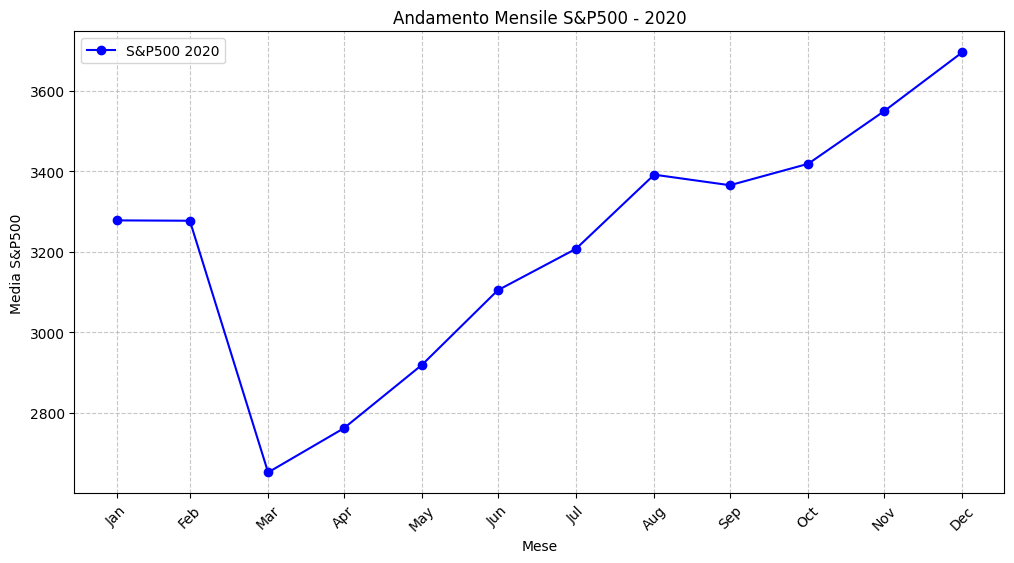

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtriamo i dati per il 2020
data_2020 = monthly_data[monthly_data['Date'].dt.year == 2020]

# Creiamo il grafico
plt.figure(figsize=(12, 6))
plt.plot(data_2020['Date'], data_2020['S&P500'], marker='o', linestyle='-', color='blue', label='S&P500 2020')

# Titolo e etichette
plt.title('Andamento Mensile S&P500 - 2020')
plt.xlabel('Mese')
plt.ylabel('Media S&P500')

# Aggiungiamo la griglia e la legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostriamo i nomi dei mesi sull'asse X
plt.xticks(data_2020['Date'], data_2020['Date'].dt.strftime('%b'), rotation=45)

# Visualizziamo il grafico
plt.show()


Si può notare che il grande picco verso il basso si può ricollegare all'inizio del COVID, nei mesi di marzo aprile 2020. Successivamente si nota una graduale ripresa

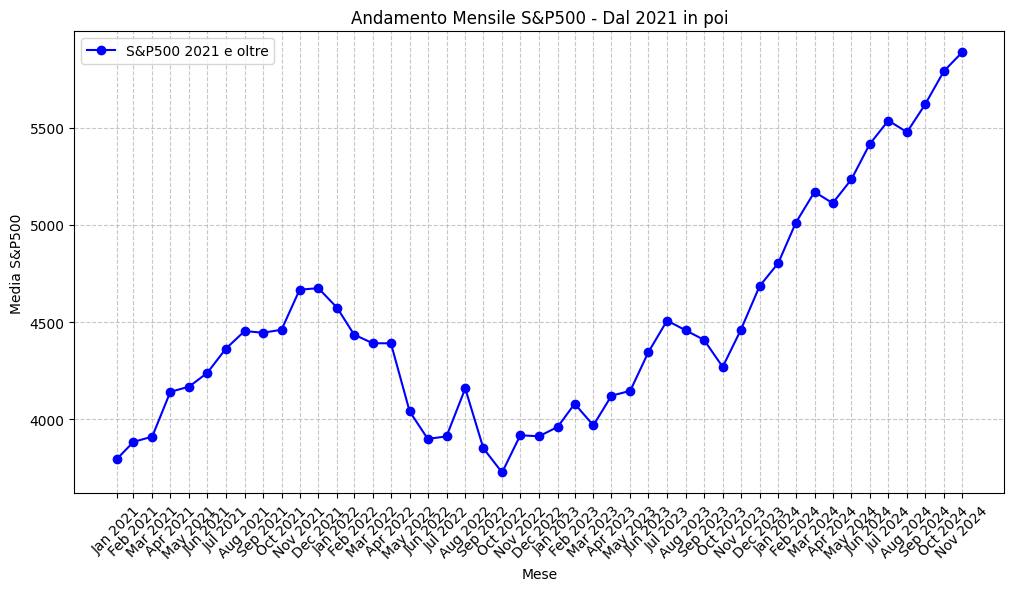

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtriamo i dati dal 2021 in poi
data_2021_onwards = monthly_data[monthly_data['Date'].dt.year >= 2021]

# Creiamo il grafico
plt.figure(figsize=(12, 6))
plt.plot(data_2021_onwards['Date'], data_2021_onwards['S&P500'], marker='o', linestyle='-', color='blue', label='S&P500 2021 e oltre')

# Titolo e etichette
plt.title('Andamento Mensile S&P500 - Dal 2021 in poi')
plt.xlabel('Mese')
plt.ylabel('Media S&P500')

# Aggiungiamo la griglia e la legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostriamo i nomi dei mesi sull'asse X
plt.xticks(data_2021_onwards['Date'], data_2021_onwards['Date'].dt.strftime('%b %Y'), rotation=45)

# Visualizziamo il grafico
plt.show()


un altro momento di picco verso il basso si ha ad inizio 2022 fino al 2023, ricollegabile alla difficile situazione geopolitica tra russia e ucraina

Stagionalità di 13 mesi e trend mediamente positivo. Il fatto che a tratti il trend sia negativo credo possa dipendere dagli anni del covid e della guerra Ucraina-Russia, ma questa è solo una supposizione basata sul grafico corrente(STL) e sui 2 precedenti.

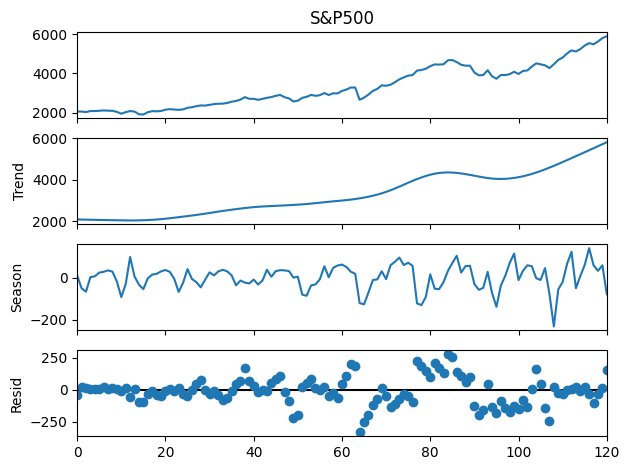

In [192]:
# Esegui la decomposizione STL
stl = STL(monthly_data['S&P500'], period=13)  # Modifica la stagionalità a seconda dei tuoi dati
result = stl.fit()

res = stl.fit()
fig = res.plot()



#### Suddivisione dataset training-test 80/20

In [195]:
import pandas as pd

# Ordina il DataFrame per la colonna Date
df_data = monthly_data.sort_values(by='Date')

# Trova la data di cutoff per gli ultimi 2 anni
cutoff_date = df_data['Date'].max() - pd.Timedelta(days=2*365)  # 2 anni in giorni

# Crea il DataFrame train (tutti i dati precedenti a cutoff_date) e test (ultimi 2 anni)
train_data = df_data[df_data['Date'] <= cutoff_date]
test_data = df_data[df_data['Date'] > cutoff_date]

# Stampa o verifica i DataFrame
print("Train DataFrame:")
print(train_data.head())

print("\nTest DataFrame:")
print(test_data.head())

print(f"Lunghezza test: {len(test_data)}")
print(f"Lunghezza train: {len(train_data)}")
print(f"Lunghezza totale: {len(df_data)}")


Train DataFrame:
        Date       S&P500
0 2014-11-30  2055.824545
1 2014-12-31  2054.266364
2 2015-01-31  2028.178500
3 2015-02-28  2082.195789
4 2015-03-31  2079.990455

Test DataFrame:
          Date       S&P500
97  2022-12-31  3912.380952
98  2023-01-31  3960.656500
99  2023-02-28  4079.684737
100 2023-03-31  3968.559130
101 2023-04-30  4121.467368
Lunghezza test: 24
Lunghezza train: 97
Lunghezza totale: 121


## Forecasting

### Stationarity

In [196]:
def test_stationarity(ts):
    stats = ['Test Statistic', 'p-value']
    # Applica il test di Dickey-Fuller aumentato
    df_test = adfuller(ts.dropna())  # Rimuovi i NaN per evitare errori
    df_results = pd.Series(df_test[0:2], index=stats)
    
    print('ADF statistic:', df_results.iloc[0])
    print('P-value:', df_results.iloc[1])
    
    if df_results.iloc[1] <= 0.05:
        print("La serie è stazionaria (rifiutiamo H0).")
    else:
        print("La serie non è stazionaria (non rifiutiamo H0).")

In [198]:
test_stationarity(train_data['S&P500'])

ADF statistic: -0.6331814785213524
P-value: 0.8633067426989705
La serie non è stazionaria (non rifiutiamo H0).


Questo valore è molto alto, vicino a 1.
Un valore p così elevato indica che non hai evidenza sufficiente per rifiutare l'ipotesi nulla (H₀), che afferma che la serie non è stazionaria. Quindi serie non stazionaria (media, varianza o covarianza variano nel tempo). Per renderla stazonaria applicando le differenze ecc.

In [200]:
train_data['S&P500_diff'] = train_data['S&P500'].diff()
train_data['S&P500_diff'].head()

C:\Users\lucab\AppData\Local\Temp\ipykernel_20180\693865438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['S&P500_diff'] = train_data['S&P500'].diff()


0          NaN
1    -1.558182
2   -26.087864
3    54.017289
4    -2.205335
Name: S&P500_diff, dtype: float64

In [201]:
test_stationarity(train_data['S&P500_diff'])

ADF statistic: -8.627607832883001
P-value: 5.872319412337107e-14
La serie è stazionaria (rifiutiamo H0).


Questo valore di ADF è ora molto negativo, il che suggerisce una forte evidenza contro l'ipotesi nulla (H₀). Un p-value così basso conferma che possiamo rifiutare l'ipotesi nulla (H₀) con grande confidenza. Concludiamo quindi che la serie è stazionaria dopo la differenziazione.

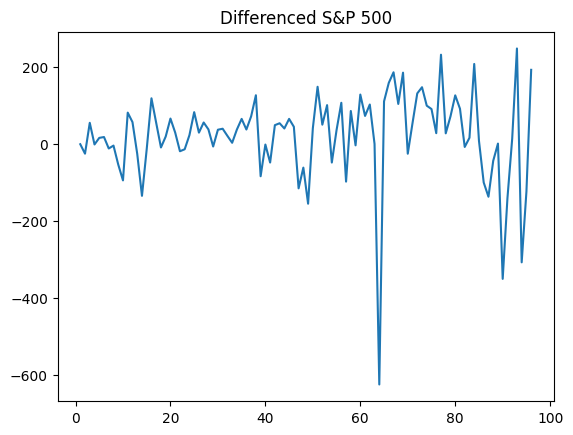

In [202]:
import matplotlib.pyplot as plt
train_data['S&P500_diff'].dropna().plot(title="Differenced S&P 500")
plt.show()

### ACF and PACF graphs

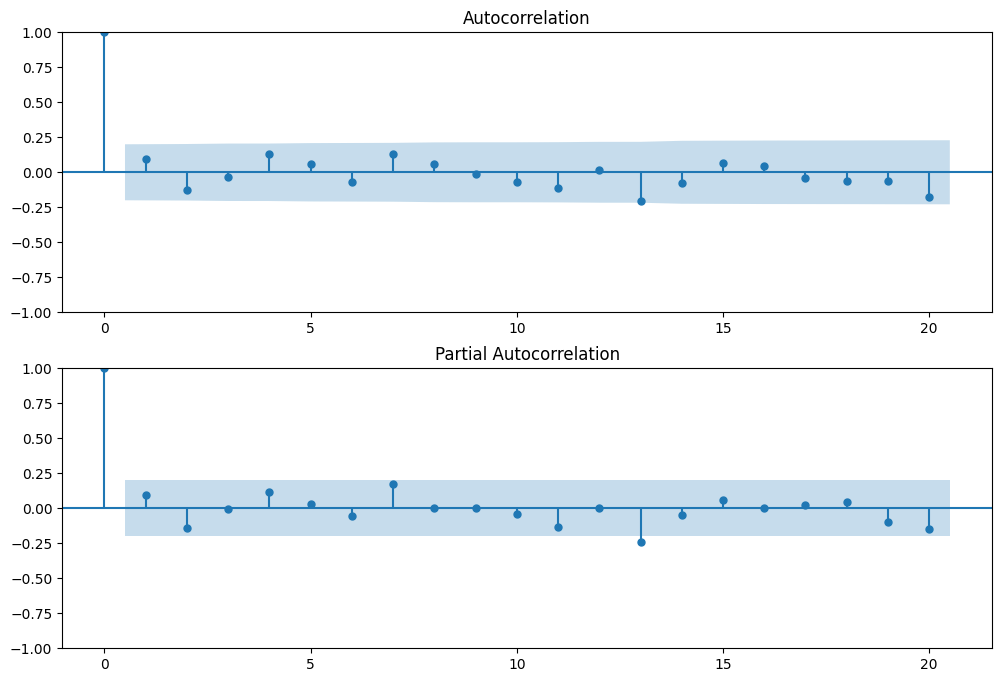

In [203]:
# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data['S&P500_diff'][1:],  ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data['S&P500_diff'][1:], ax=ax2)

In [204]:
train_data_dropped = train_data.drop('S&P500', axis=1)
train_data_dropped.describe()

,Date,S&P500_diff
count,97,96.000000
mean,2018-11-29 23:45:09.278350592,19.392334
min,2014-11-30 00:00:00,-624.920574
25%,2016-11-30 00:00:00,-13.039746
50%,2018-11-30 00:00:00,32.020132
75%,2020-11-30 00:00:00,80.718593
max,2022-11-30 00:00:00,246.833543
std,NaN,117.557183


In [205]:
test_stationarity(train_data_dropped['S&P500_diff'])

ADF statistic: -8.627607832883001
P-value: 5.872319412337107e-14
La serie è stazionaria (rifiutiamo H0).


In [206]:
train_data_dropped = train_data_dropped.dropna(subset=['S&P500_diff'])

print("\nDataFrame dopo aver eliminato le righe con 'Col1' nullo:")
print(train_data_dropped)


DataFrame dopo aver eliminato le righe con 'Col1' nullo:
         Date  S&P500_diff
1  2014-12-31    -1.558182
2  2015-01-31   -26.087864
3  2015-02-28    54.017289
4  2015-03-31    -2.205335
5  2015-04-30    14.872403
..        ...          ...
92 2022-07-31    12.782833
93 2022-08-31   246.833543
94 2022-09-30  -308.042567
95 2022-10-31  -124.469524
96 2022-11-30   191.437619

[96 rows x 2 columns]


### ARIMA(0,0,0)

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        S&P500_diff   No. Observations:                   96
Model:             ARIMA(2, 0, 2)x(1, 0, [1], 13)   Log Likelihood                -587.986
Date:                            Tue, 26 Nov 2024   AIC                           1191.971
Time:                                    20:42:19   BIC                           1212.486
Sample:                                         0   HQIC                          1200.264
                                             - 96                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8980     15.385      1.293      0.196     -10.257      50.053
ar.L1         -0.1393      0.134   

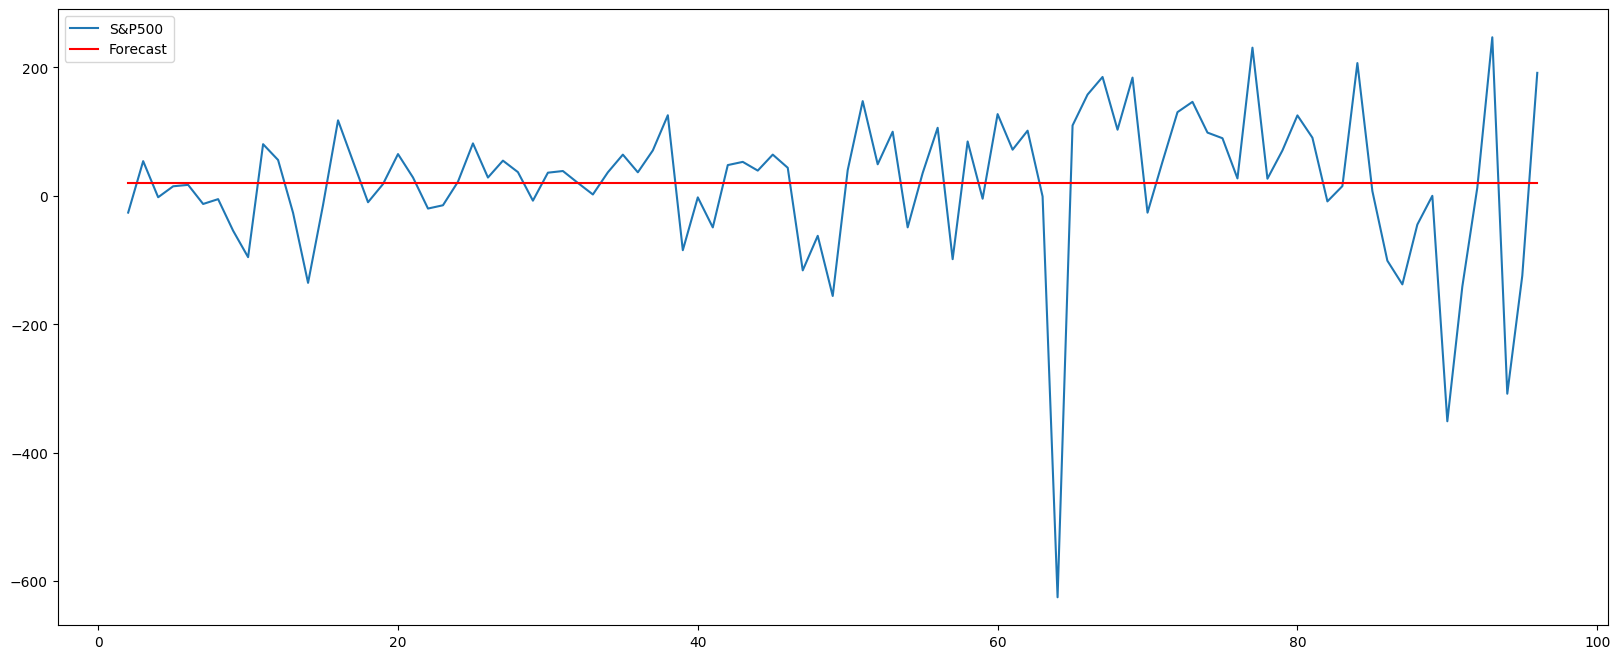

In [207]:
# Fit del modello SARIMA con i parametri trovati da auto_arima
model = ARIMA(train_data_dropped['S&P500_diff'], order=(0,0,0))
results_base = model.fit()

# Visualizza il grafico
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(train_data_dropped['S&P500_diff'][1:])
plt.plot(results_base.fittedvalues[1:], color='red')
ax.legend(['S&P500', 'Forecast'])

# Mostra il sommario dei risultati
print(results.summary())

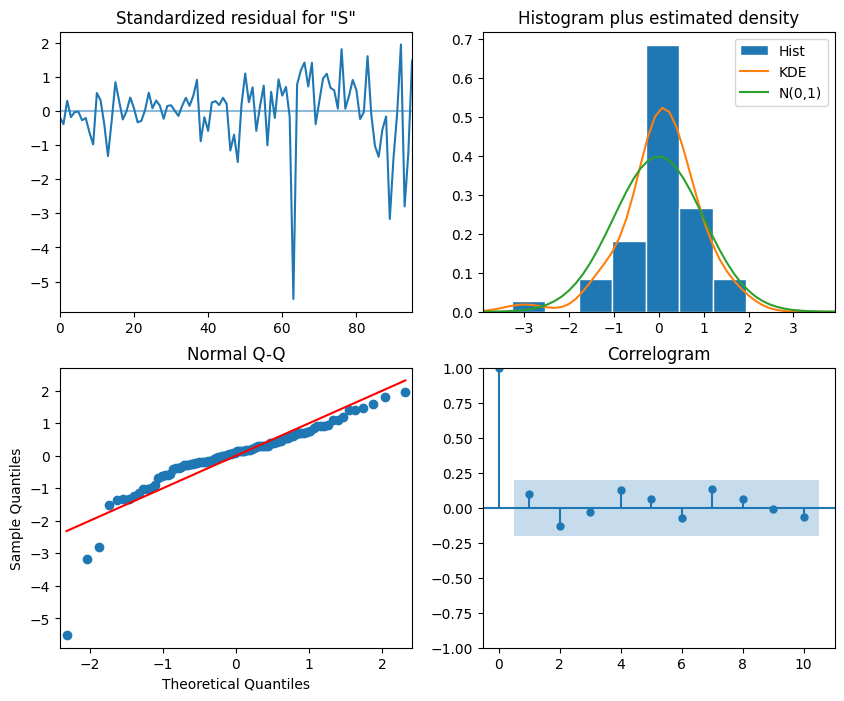

In [208]:
results_base.plot_diagnostics(figsize=(10, 8))
plt.show()

#### Test di Ljun-Box sui residui

In [209]:
# Test di Ljung-Box sui residui
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print("Risultati del test di Ljung-Box:")
print(lb_test)

Risultati del test di Ljung-Box:
      lb_stat  lb_pvalue
10   3.106761   0.978799
20  13.364860   0.861186
30  18.201499   0.955179


### AutoArima

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# Trova automaticamente il miglior modello SARIMA con auto_arima
#model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)
model = auto_arima(train_data_dropped['S&P500_diff'], seasonal=True,m=13, stepwise=True, trace=True)

# Stampa i parametri del miglior modello trovato
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[13] intercept   : AIC=1192.746, Time=2.08 sec
 ARIMA(0,0,0)(0,0,0)[13] intercept   : AIC=1190.681, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[13] intercept   : AIC=1188.604, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[13] intercept   : AIC=1189.095, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[13]             : AIC=1191.285, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[13] intercept   : AIC=1191.762, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[13] intercept   : AIC=1190.186, Time=0.62 sec
 ARIMA(1,0,0)(1,0,1)[13] intercept   : AIC=1190.154, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[13] intercept   : AIC=1189.397, Time=0.13 sec
 ARIMA(1,0,0)(2,0,1)[13] intercept   : AIC=1192.139, Time=0.84 sec
 ARIMA(0,0,0)(1,0,0)[13] intercept   : AIC=1187.286, Time=0.38 sec
 ARIMA(0,0,0)(2,0,0)[13] intercept   : AIC=1188.902, Time=0.35 sec
 ARIMA(0,0,0)(1,0,1)[13] intercept   : AIC=1188.889, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[13] intercept   : AIC=1188.110, Time=0.05 sec
 ARIMA(0,0,0)(2,0,1

### ARIMA(2,0,2)(1,0,1,13)

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib

                                     SARIMAX Results                                      
Dep. Variable:                        S&P500_diff   No. Observations:                   96
Model:             ARIMA(2, 0, 2)x(1, 0, [1], 13)   Log Likelihood                -587.986
Date:                            Tue, 26 Nov 2024   AIC                           1191.971
Time:                                    20:42:34   BIC                           1212.486
Sample:                                         0   HQIC                          1200.264
                                             - 96                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8980     15.385      1.293      0.196     -10.257      50.053
ar.L1         -0.1393      0.134   

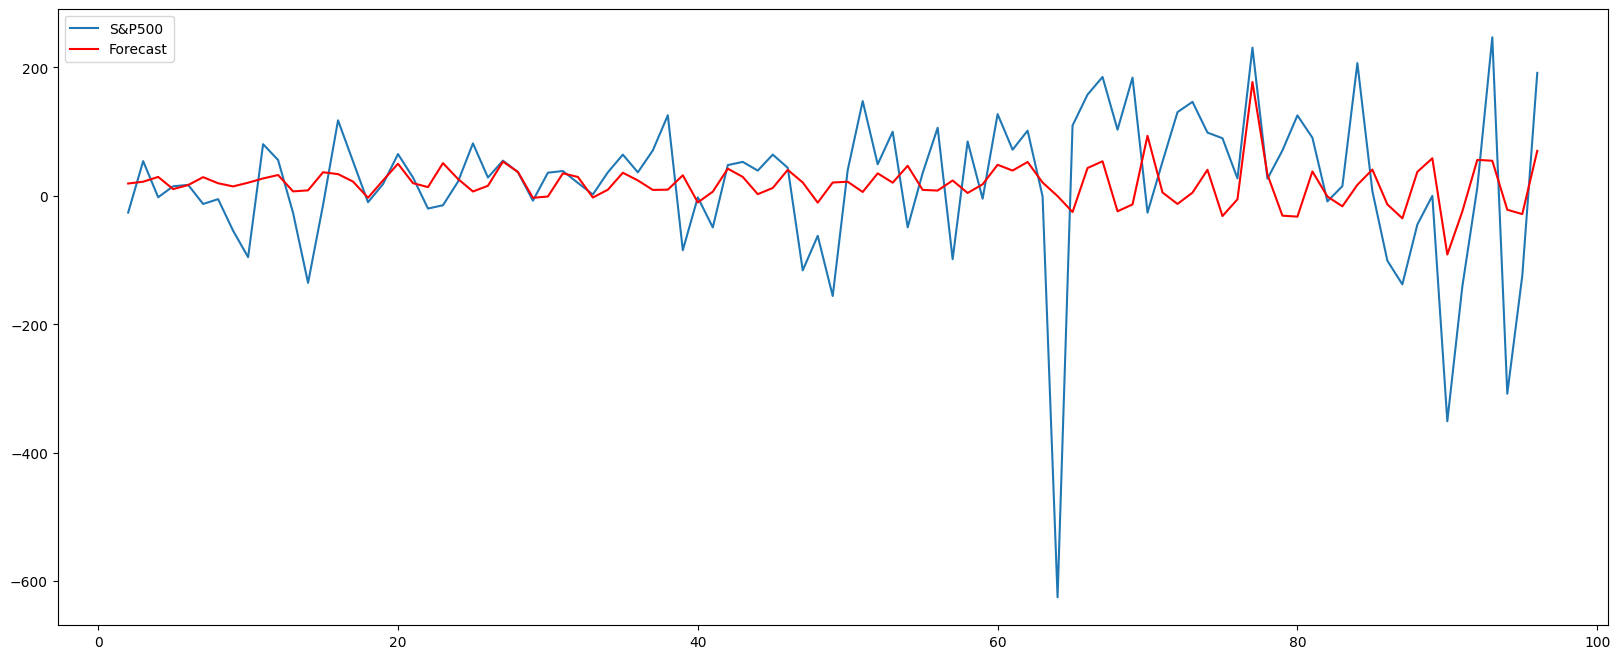

In [211]:
# Fit del modello SARIMA con i parametri trovati da auto_arima
model = ARIMA(train_data_dropped['S&P500_diff'], order=(2,0,2), seasonal_order=(1,0,1,13))
results = model.fit()

# Visualizza il grafico
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(train_data_dropped['S&P500_diff'][1:])
plt.plot(results.fittedvalues[1:], color='red')
ax.legend(['S&P500', 'Forecast'])

# Mostra il sommario dei risultati
print(results.summary())

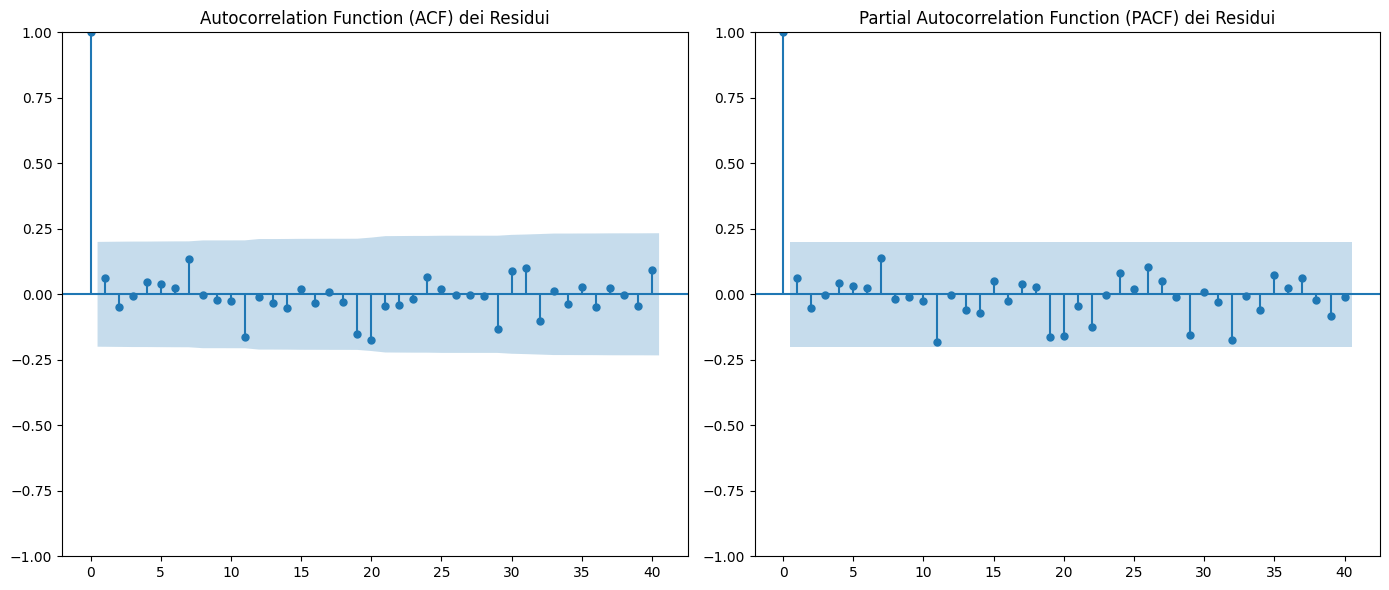

In [212]:
# Previsione dei residui
residuals = results.resid

# Creazione dei grafici ACF e PACF dei residui
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF: Autocorrelation Function
plot_acf(residuals, ax=axes[0], lags=40)  # Lags=40 per osservare la correlazione a lungo termine
axes[0].set_title('Autocorrelation Function (ACF) dei Residui')

# PACF: Partial Autocorrelation Function
plot_pacf(residuals, ax=axes[1], lags=40)  # Lags=40 per osservare la correlazione parziale
axes[1].set_title('Partial Autocorrelation Function (PACF) dei Residui')

plt.tight_layout()
plt.show()

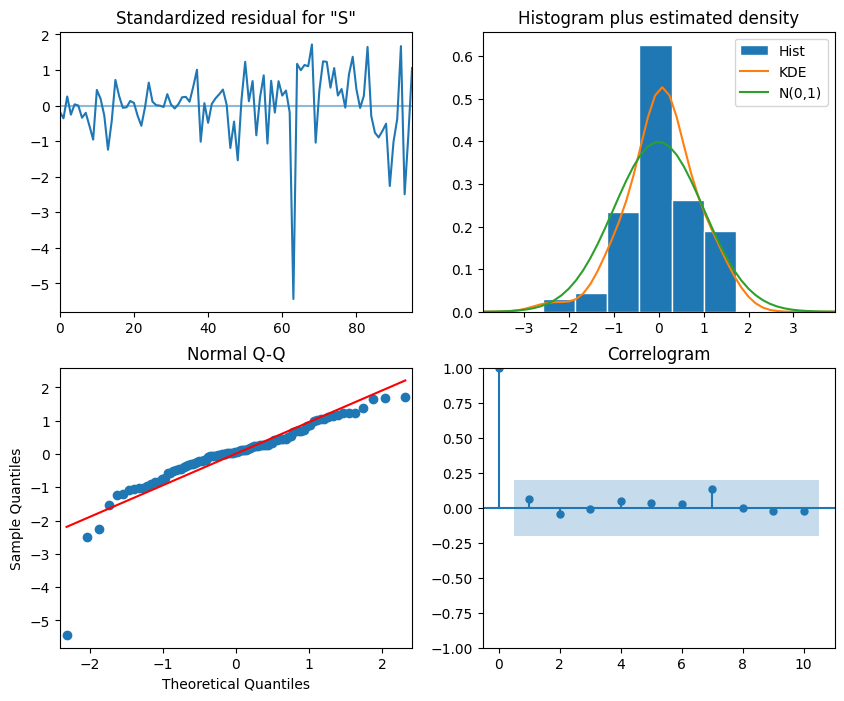

In [213]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

#### Test && Metriche

In [232]:
test_data['S&P500_diff'] = test_data['S&P500'].diff()
test_data.dropna(inplace=True)
test_data.head()
print(f"Nuova lunghezza TEST_DATA: {len(test_data)}")

Nuova lunghezza TEST_DATA: 22


C:\Users\lucab\AppData\Local\Temp\ipykernel_20180\319522663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['S&P500_diff'] = test_data['S&P500'].diff()
C:\Users\lucab\AppData\Local\Temp\ipykernel_20180\319522663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace=True)


c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


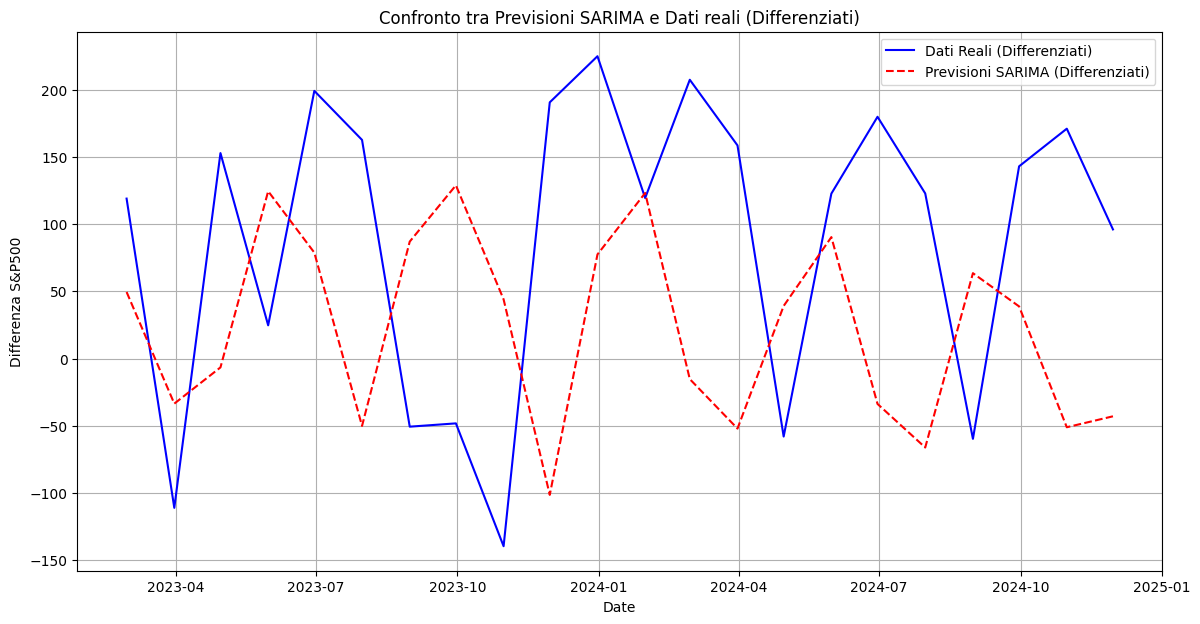

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

#print('test_data',test_data['S&P500_diff'])


# Fare la previsione con il modello SARIMAX
predictions = results.get_forecast(steps=len(test_data['S&P500_diff']))
y_pred = predictions.predicted_mean

y_pred.index = test_data['Date']  # Escludi la prima riga differenziata
y_true = test_data['S&P500_diff']
y_true.index = test_data['Date'] # Escludi la prima riga differenziata




# Step 5: Creazione del grafico
plt.figure(figsize=(14, 7))
plt.plot(y_true, label='Dati Reali (Differenziati)', color='blue')
plt.plot(y_pred, label='Previsioni SARIMA (Differenziati)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Differenza S&P500')
plt.title('Confronto tra Previsioni SARIMA e Dati reali (Differenziati)')
plt.legend()
plt.grid(True)
plt.show()

In [235]:
# Calcolare gli indicatori di valutazione
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Stampare gli indicatori di valutazione
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R²: {r2:.4f}")

Mean Absolute Error (MAE): 147.1113
Mean Squared Error (MSE): 26275.6111
Root Mean Squared Error (RMSE): 162.0975
Mean Absolute Percentage Error (MAPE): 1.4001
R²: -1.1407


In [110]:
# Test di Ljung-Box sui residui
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print("Risultati del test di Ljung-Box:")
print(lb_test)

Risultati del test di Ljung-Box:
      lb_stat  lb_pvalue
10   8.073550   0.621653
20  20.694404   0.415312
30  29.923005   0.469602
